In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp

# Data

In [2]:
# #          16     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16     
# day1   = [44.7, 44.0, 43.5, 39.7, 35.2, 34.7, 34.3, 32.5, 28.2, 26.2, 23.8, 23.2, 20.3, 18.7, 17.5, 16.8, 13.7]
# day2   = [57.4, 57.3, 58.2, 59.2, 58.7, 60.2, 60.8, 62.0, 61.5, 63.3, 65.8, 67.3, 69.7, 70.7, 73.0, 70.2, 72.2]
# day3   = [27.3, 23.5, 22.0, 19.3, 19.2, 19.3, 18.7, 18.8, 16.2, 14.3, 13.3, 12.8, 13.3, 12.3, 10.2, 07.3, 06.5]
# day_avg = np.mean([day1, day2, day3], axis = 0)
# day_wv_full = day_avg * 0.02
# day_wv = np.mean([day_wv_full[:9], day_wv_full[8:]], axis = 0)

# #          16     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16   
# eve1   = [61.2, 63.3, 63.3, 68.2, 67.7, 69.3, 70.3, 69.8, 69.0, 71.3, 71.3, 70.5, 71.2, 71.2, 70.5, 72.5, 75.7]
# eve2   = [26.0, 26.0, 28.2, 29.2, 31.5, 32.0, 31.3, 31.7, 33.0, 35.8, 36.5, 37.3, 38.8, 41.0, 42.7, 43.7, 44.0]
# eve3   = [66.8, 66.5, 66.0, 64.3, 62.2, 61.0, 61.3, 59.7, 58.2, 55.7, 53.7, 54.7, 55.0, 58.2, 58.5, 57.0, 56.0]
# eve_avg = np.mean([eve1, eve2, eve3], axis = 0)
# eve_wv_full = eve_avg * 0.02
# eve_wv = np.mean([eve_wv_full[:9], eve_wv_full[8:]], axis = 0)

Measurements Explanation:
For each orientation step, they measured the "location" of the next fringe i.e: 
     o 
1:   | | | |
at the next step, I believe they measured the "location" of the next fringe:
     o x
2:   | | | |
This is where my knowledge breaks down. Either they expected the distances between fringes to increase and would have measaured:
     o  x
2':  |  |  |  |
in which they would have expected the distances between fringes to oscilate with time, or they expected that the entire fringe pattern would have shifted:
     o  x 
2'': |:|:|:|:
and were expecting to see that the fringes would have shifted farther than normal. Either way, the quantity of interest was the difference in the "location" of the fringes.

In [3]:
orientation = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
angle = orientation * np.pi/8

#        16     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16     
day1 = [44.7, 44.0, 43.5, 39.7, 35.2, 34.7, 34.3, 32.5, 28.2, 26.2, 23.8, 23.2, 20.3, 18.7, 17.5, 16.8, 13.7]
day2 = [57.4, 57.3, 58.2, 59.2, 58.7, 60.2, 60.8, 62.0, 61.5, 63.3, 65.8, 67.3, 69.7, 70.7, 73.0, 70.2, 72.2]
day3 = [27.3, 23.5, 22.0, 19.3, 19.2, 19.3, 18.7, 18.8, 16.2, 14.3, 13.3, 12.8, 13.3, 12.3, 10.2, 07.3, 06.5]

# Splitting each day's data into two halves since the experiment is supposed to be symmetric
# Putting it all into a single array
day_list = np.array([day1[:9], day1[8:], day2[:9], day2[8:], day3[:9], day3[8:]])

# Finding the difference between each measurement, but doing so by taking d_i - d_i+1
day_deltas_incomplete = np.diff(-day_list)
# Adding in a zero point as they have done
day_deltas = np.insert(day_deltas_incomplete, 0, 0, axis = 1)

# Shifting each data set to the mean of that data set so that it's centered at zero, like they have done
day_diffs = np.empty(np.shape(day_deltas))
for i, d_list in enumerate(day_deltas):
    day_diffs[i] = d_list - np.mean(d_list)

#        16     1     2     3     4     5     6     7     8     9    10    11    12    13    14    15    16   
eve1 = [61.2, 63.3, 63.3, 68.2, 67.7, 69.3, 70.3, 69.8, 69.0, 71.3, 71.3, 70.5, 71.2, 71.2, 70.5, 72.5, 75.7]
eve2 = [26.0, 26.0, 28.2, 29.2, 31.5, 32.0, 31.3, 31.7, 33.0, 35.8, 36.5, 37.3, 38.8, 41.0, 42.7, 43.7, 44.0]
eve3 = [66.8, 66.5, 66.0, 64.3, 62.2, 61.0, 61.3, 59.7, 58.2, 55.7, 53.7, 54.7, 55.0, 58.2, 58.5, 57.0, 56.0]

# Splitting each day's data into two halves since the experiment is supposed to be symmetric
# Putting it all into a single array
eve_list = np.array([eve1[:9], eve1[8:], eve2[:9], eve2[8:], eve3[:9], eve3[8:]])

# Finding the difference between each measurement, but doing so by taking d_i - d_i++
eve_deltas_incomplete = np.diff(-eve_list)
# Adding in a zero point as they have done
eve_deltas = np.insert(eve_deltas_incomplete, 0, 0, axis = 1)

# Shifting each data set to the mean of that data set so that it's centered at zero, like they have done
eve_diffs = np.empty(np.shape(eve_deltas))
for i, d_list in enumerate(eve_deltas):
    eve_diffs[i] = d_list - np.mean(d_list)

In [31]:
division_err = 0.25 # Division steps measured to the 0.1, assume uniform error from lecture 17
diff_err = np.sqrt(2) * division_err # error on the difference in divisions, added in quadrature
mean_diff_err = diff_err/np.sqrt(6) # error on the mean in the difference, splitting each sample

"the width of the fringes varied from 40 to 60 divisions, the mean value being near 50, so that one division means 0.02 wavelength"
# Assuming gaussian error on fringe width of 7
# 1/50 = 0.02, 1/43 = 0.0236, 1/57 = 0.01754, conversion = 0.02 +- 0.0029 

print(division_err)
print(diff_err)
print(mean_diff_err)

mean_err = mean_diff_err * 0.02
div_wv_err = 0.0029
wv_err = np.sqrt( mean_err**2 + div_wv_err**2)
# wv_err = 0.05
print(mean_err)
print(wv_err)

0.25
0.3535533905932738
0.14433756729740646
0.0028867513459481294
0.004091861841916628


<ErrorbarContainer object of 3 artists>

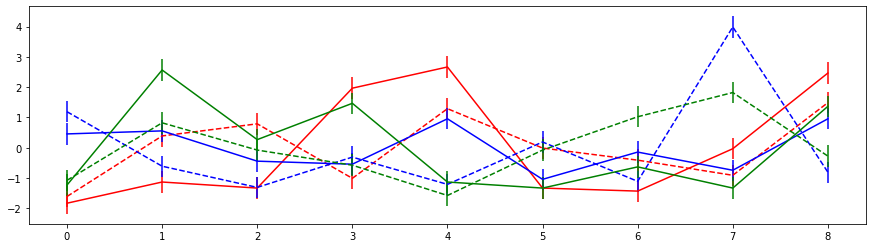

In [5]:
fig, ax = plt.subplots(figsize = (15,4))
ax.errorbar(orientation, day_diffs[0], yerr = diff_err, color = 'red')
ax.errorbar(orientation, day_diffs[1], yerr = diff_err, color = 'red', ls = "--")
ax.errorbar(orientation, day_diffs[2], yerr = diff_err, color = 'blue')
ax.errorbar(orientation, day_diffs[3], yerr = diff_err, color = 'blue', ls = '--')
ax.errorbar(orientation, day_diffs[4], yerr = diff_err, color = 'green')
ax.errorbar(orientation, day_diffs[5], yerr = diff_err, color = 'green', ls = '--')

<ErrorbarContainer object of 3 artists>

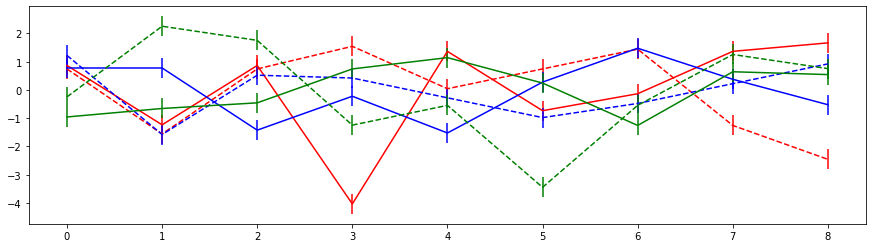

In [6]:
fig, ax = plt.subplots(figsize = (15,4))
ax.errorbar(orientation, eve_diffs[0], yerr = diff_err, color = 'red')
ax.errorbar(orientation, eve_diffs[1], yerr = diff_err, color = 'red', ls = "--")
ax.errorbar(orientation, eve_diffs[2], yerr = diff_err, color = 'blue')
ax.errorbar(orientation, eve_diffs[3], yerr = diff_err, color = 'blue', ls = '--')
ax.errorbar(orientation, eve_diffs[4], yerr = diff_err, color = 'green')
ax.errorbar(orientation, eve_diffs[5], yerr = diff_err, color = 'green', ls = '--')

In [7]:
# Averaging Differences:
day_mean = np.mean(day_diffs, axis = 0)
eve_mean = np.mean(eve_diffs, axis = 0)

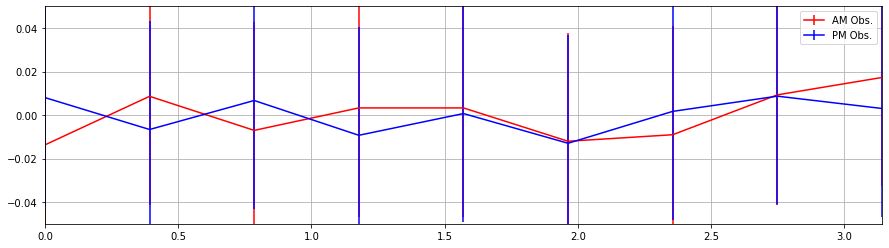

In [8]:
fig, ax = plt.subplots(figsize = (15,4))
ax.errorbar(angle, day_mean*0.02, yerr = wv_err, color = 'red', label = 'AM Obs.')
# ax.plot(angle, day_mean*0.02, color = 'red', label = 'AM Obs.')
ax.errorbar(angle, eve_mean*0.02, yerr = wv_err, color = 'blue', label = 'PM Obs.')
# ax.plot(angle, eve_mean*0.02, color = 'blue', label = 'PM Obs.')
ax.set_ylim(-0.05, 0.05)
ax.set_xlim(0,np.pi)
ax.grid()
ax.legend()

# Modelling

Three models to test:
- Null Model: Displacement is orientation-independent
- Michelson-Morley Model: Displacement oscillates between $\pm 0.4$ from 0 to $\pi$
- Free Model: Displacement amplitude is a free parameter, and our offset is not necessarily aligned with the velocity of the Earth

In [51]:
def null_model(theta, params):
    return theta*0

def mm_model(theta, params):
    disp = 0.4*np.sin(2*theta)
    return disp

def free_model(theta, params):
    amp = params[0]
    off = params[1]
    disp = amp*np.sin(2*(theta) + off)
    return disp

In [52]:
def chi2(params, data, model):
    chi_2 = 0
    for i, d in enumerate(data):
        theta = angle[i]
        chi_2 += (d - model(theta, params))**2/wv_err**2
        
    return chi_2

In [53]:
fit_null_day = sp.minimize(chi2, (0,0), args = (day_mean, null_model))
fit_mm_day = sp.minimize(chi2, (0,0), args = (day_mean, mm_model))
fit_free_day = sp.minimize(chi2, (0, 0), args = (day_mean, free_model))

In [54]:
print(fit_null_day)
print(fit_mm_day)
print(fit_free_day)

      fun: 141198.63442977105
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])
      fun: 149868.5939183572
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])
      fun: 124531.81215620061
 hess_inv: array([[4.21046907e-06, 7.12244524e-06],
       [7.12244524e-06, 2.39687546e-05]])
      jac: array([0.        , 0.00195312])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 36
      nit: 10
     njev: 12
   status: 2
  success: False
        x: array([0.24615869, 0.89156218])


In [55]:
theta_vals = np.linspace(0, np.pi, 100)
null_vals = null_model(theta_vals,(0,0))
mm_vals = mm_model(theta_vals,(0,0))
free_vals = free_model(theta_vals, fit_free_day.x)

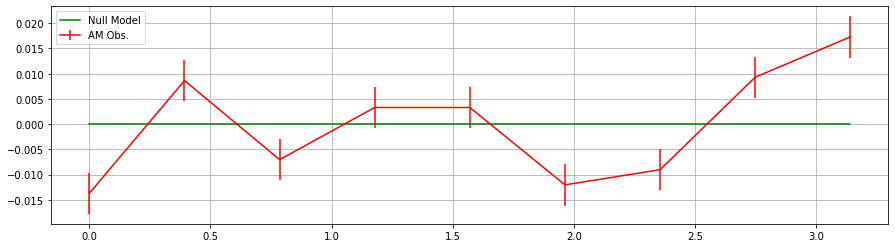

In [59]:
fig, ax = plt.subplots(figsize = (15,4))
ax.errorbar(angle, day_mean*0.02, yerr = wv_err, color = 'red', label = 'AM Obs.')
# ax.errorbar(angle, eve_mean*0.02, yerr = wv_err, color = 'blue', label = 'PM Obs.')
ax.plot(theta_vals, null_vals, color = 'green', label = 'Null Model')
# ax.plot(theta_vals, mm_vals, color = 'blue', label = 'M-M Model')
# ax.plot(theta_vals, free_vals, color = 'black', label = 'Free Model')
# ax.set_ylim(-0.05, 0.05)
# ax.set_xlim(0,np.pi)
ax.grid()
ax.legend()